<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_5_Checkout_Completion_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kasus 05 : Platform E-Commerce "ShopEase"
ShopEase adalah sebuah platform e-commerce besar yang menyediakan berbagai produk dari kebutuhan sehari-hari hingga barang elektronik. Platform ini menawarkan dua cara untuk menyelesaikan proses checkout, yaitu melalui metode login/signup atau sebagai guest. Tim manajemen ShopEase ingin meningkatkan tingkat penyelesaian transaksi (checkout completion rate) dan memperbaiki pengalaman pengguna dalam proses checkout.

Tim Data Analyst di ShopEase melakukan analisis terhadap data checkout dari ribuan pengguna untuk memahami bagaimana berbagai variabel mempengaruhi penyelesaian checkout. Mereka mengumpulkan data tentang metode checkout, waktu yang dihabiskan untuk menyelesaikan checkout, perangkat yang digunakan, dan nilai keranjang belanja. Dengan analisis ini, tim berharap bisa menjawab beberapa pertanyaan penting yang bisa membantu mereka memperbaiki proses checkout dan meningkatkan konversi.


## Dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
file_path = "https://docs.google.com/spreadsheets/d/1xyg586q68YC_wUl9k32fxKoY0FslgJsP/export?format=csv"

In [25]:
df = pd.read_csv(file_path)
df.head()

,User_ID,Session_ID,Checkout_Method,Order_Completed,Time_Spent,Device_Type,Cart_Value,Signup_or_Login,Date
0,103,1,Login/Signup,0,595,Desktop,400.28,Signup,2024-10-05
1,436,2,Guest,1,349,Tablet,380.81,NaN,2024-10-10
2,349,3,Login/Signup,0,155,Desktop,343.47,Login,2024-10-07
3,271,4,Guest,1,306,Tablet,91.38,NaN,2024-10-10
4,107,5,Guest,1,233,Tablet,38.96,NaN,2024-10-04


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_ID          1000 non-null   int64  
 1   Session_ID       1000 non-null   int64  
 2   Checkout_Method  1000 non-null   object 
 3   Order_Completed  1000 non-null   int64  
 4   Time_Spent       1000 non-null   int64  
 5   Device_Type      1000 non-null   object 
 6   Cart_Value       1000 non-null   float64
 7   Signup_or_Login  503 non-null    object 
 8   Date             1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum()

,0
User_ID,0
Session_ID,0
Checkout_Method,0
Order_Completed,0
Time_Spent,0
Device_Type,0
Cart_Value,0
Signup_or_Login,497
Date,0


## Soal 1
Bagaimana pengaruh kewajiban login/signup terhadap checkout completion rate dibandingkan dengan opsi guest checkout?


### Jawab :

In [29]:
## Checkout Completion Rate Berdasarkan Metode Checkout
completion_rate_by_method = df.groupby("Checkout_Method")["Order_Completed"].mean () * 100
completion_rate_by_method

,Order_Completed
Checkout_Method,
Guest,75.251509
Login/Signup,60.039761


<ipython-input-30-5f47f9628f80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completion_rate_by_method.index, y=completion_rate_by_method.values, palette="viridis")


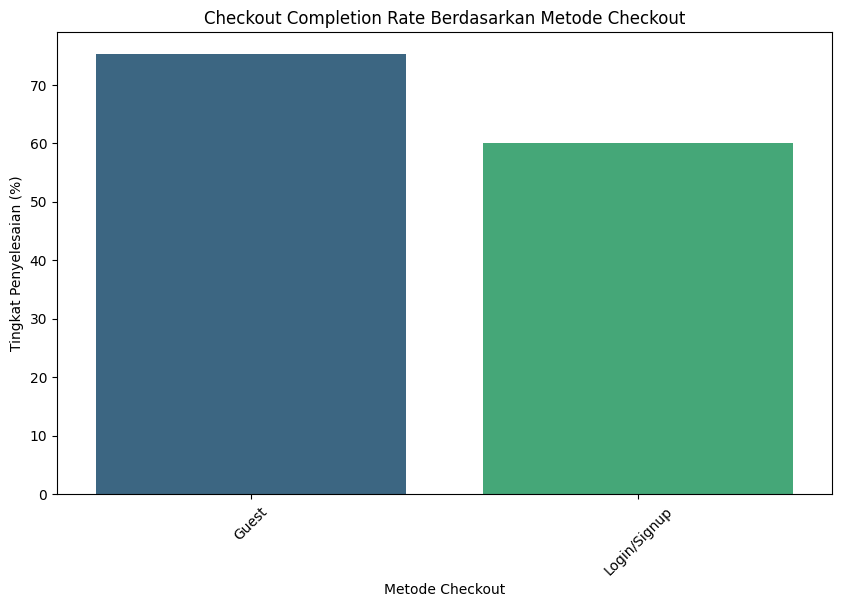

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=completion_rate_by_method.index, y=completion_rate_by_method.values, palette="viridis")
plt.title("Checkout Completion Rate Berdasarkan Metode Checkout")
plt.xlabel("Metode Checkout")
plt.ylabel("Tingkat Penyelesaian (%)")
plt.xticks(rotation=45)
plt.show()

### Analisis :

Dari data yang dianalisis, terlihat bahwa tingkat penyelesaian checkout (checkout completion rate) jauh lebih tinggi untuk pengguna yang menggunakan guest checkout (75,25%) dibandingkan dengan mereka yang diharuskan melakukan login/signup (60,04%). Ini menunjukkan bahwa kewajiban login/signup menjadi penghalang yang signifikan, yang mungkin disebabkan oleh kerumitan proses atau pengguna yang tidak ingin repot membuat akun baru.



## Soal 2

Berapa rata-rata waktu yang dihabiskan pengguna untuk menyelesaikan checkout berdasarkan metode yang digunakan (tamu vs login/signup)?


### Jawab :

In [31]:
# Rata-rata Waktu yang Dihabiskan Berdasarkan Metode Checkout
avg_time_spent_by_method = df.groupby("Checkout_Method")["Time_Spent"].mean()
avg_time_spent_by_method

,Time_Spent
Checkout_Method,
Guest,317.006036
Login/Signup,324.441352


<ipython-input-32-abc3e79d91f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_spent_by_method.index, y=avg_time_spent_by_method.values, palette="viridis")


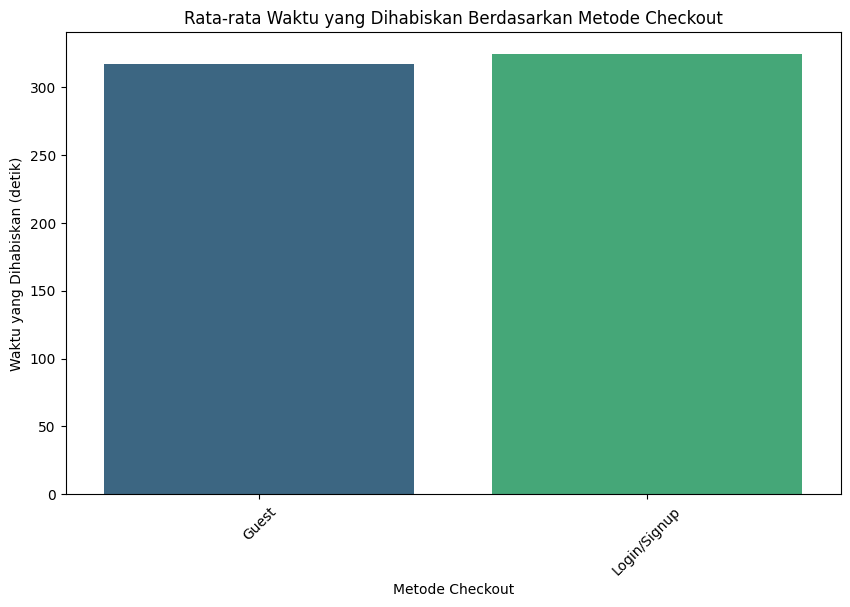

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_spent_by_method.index, y=avg_time_spent_by_method.values, palette="viridis")
plt.title("Rata-rata Waktu yang Dihabiskan Berdasarkan Metode Checkout")
plt.xlabel("Metode Checkout")
plt.ylabel("Waktu yang Dihabiskan (detik)")
plt.xticks(rotation=45)
plt.show()

### Analisis :

Rata-rata waktu yang dihabiskan untuk menyelesaikan checkout hanya sedikit berbeda antara metode checkout tamu dan login/signup. Pengguna guest checkout menghabiskan rata-rata 317 detik, sedangkan pengguna yang login/signup menghabiskan sedikit lebih lama, yaitu 324 detik. Meskipun perbedaannya tidak terlalu besar, hal ini menunjukkan bahwa proses login/signup tidak terlalu memperlambat waktu checkout, namun bisa menjadi penghalang psikologis.


## Soal 3

Apa perbedaan nilai rata-rata keranjang belanja antara checkout tamu dan login/signup?



### Jawab :

In [33]:
## Rata-rata Nilai Keranjang Berdasarkan Metode Checkout
avg_cart_value_by_method = df.groupby("Checkout_Method")["Cart_Value"].mean()
avg_cart_value_by_method

,Cart_Value
Checkout_Method,
Guest,251.760141
Login/Signup,247.987356


<ipython-input-34-37d31d7bdd08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cart_value_by_method.index, y=avg_cart_value_by_method.values, palette="viridis")


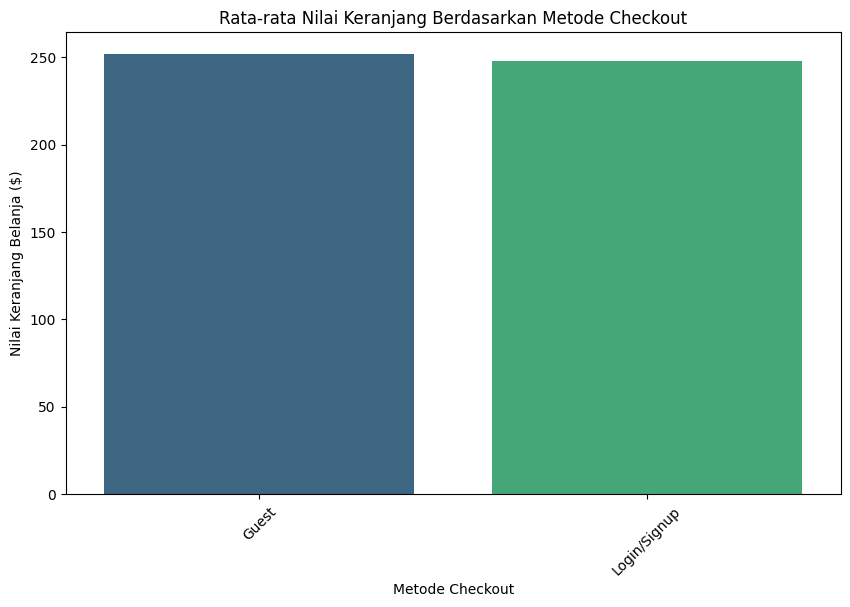

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cart_value_by_method.index, y=avg_cart_value_by_method.values, palette="viridis")
plt.title("Rata-rata Nilai Keranjang Berdasarkan Metode Checkout")
plt.xlabel("Metode Checkout")
plt.ylabel("Nilai Keranjang Belanja ($)")
plt.xticks(rotation=45)
plt.show()


### Analisis :

Nilai rata-rata keranjang belanja pengguna guest checkout sedikit lebih tinggi, yaitu $251,76, dibandingkan dengan pengguna login/signup yang memiliki nilai rata-rata keranjang belanja sebesar 247,99. Perbedaan ini, meskipun tidak besar, menunjukkan bahwa pengguna guest checkout cenderung berbelanja lebih banyak dibandingkan pengguna yang login/signup.



## Soal 4

Bagaimana variasi tingkat penyelesaian checkout berdasarkan jenis perangkat?


### Jawab :

In [35]:
## Tingkat Penyelesaian Checkout Berdasarkan Jenis Perangkat
completion_rate_by_device = df.groupby("Device_Type")["Order_Completed"].mean () * 100
completion_rate_by_device

,Order_Completed
Device_Type,
Desktop,69.520548
Mobile,66.006601
Tablet,71.568627


<ipython-input-36-c129a24598c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completion_rate_by_device.index, y=completion_rate_by_device.values, palette="viridis")


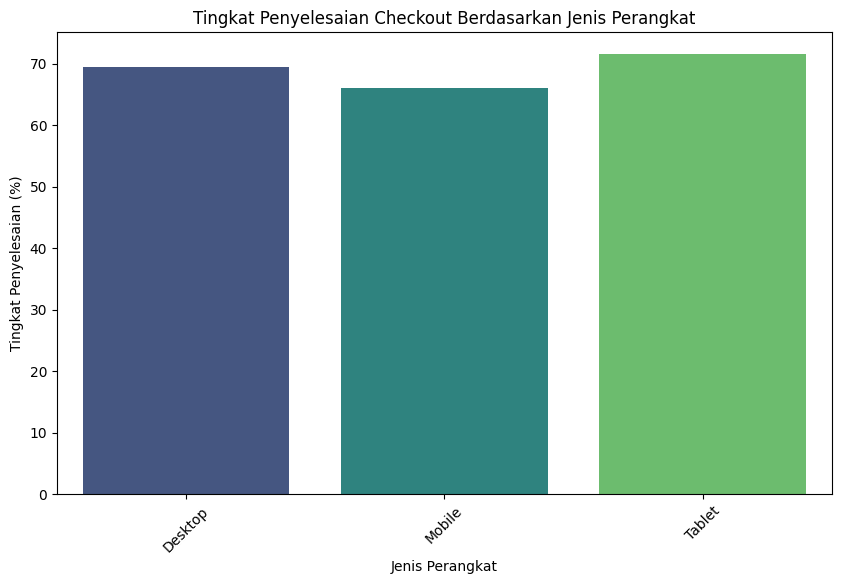

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=completion_rate_by_device.index, y=completion_rate_by_device.values, palette="viridis")
plt.title("Tingkat Penyelesaian Checkout Berdasarkan Jenis Perangkat")
plt.xlabel("Jenis Perangkat")
plt.ylabel("Tingkat Penyelesaian (%)")
plt.xticks(rotation=45)
plt.show()

### Analisis :

Terdapat variasi tingkat penyelesaian transaksi berdasarkan jenis perangkat yang digunakan. Pengguna tablet memiliki tingkat penyelesaian transaksi tertinggi dengan 71,57%, diikuti oleh pengguna desktop dengan 69,52%, dan terakhir pengguna mobile dengan 66,01%. Ini menunjukkan bahwa pengalaman pengguna mungkin lebih nyaman di perangkat yang lebih besar, seperti tablet dan desktop, dibandingkan di mobile.



## Kesimpulan

Dari analisis ini, ShopEase dapat menarik beberapa kesimpulan penting:
- Opsi Guest Checkout lebih efektif dalam mendorong konversi karena memiliki tingkat penyelesaian yang lebih tinggi dibandingkan metode login/signup. Oleh karena itu, ShopEase sebaiknya mempertimbangkan untuk memperjelas atau lebih menonjolkan opsi guest checkout, atau membuat proses login/signup lebih mudah dan cepat.
- Meskipun waktu yang dihabiskan tidak terlalu berbeda antara kedua metode, pengguna tampaknya lebih menyukai opsi guest checkout karena lebih simpel.
- Nilai keranjang belanja sedikit lebih tinggi untuk pengguna guest checkout, yang menandakan potensi keuntungan lebih besar dari metode ini.
- Pengguna tablet memiliki tingkat penyelesaian tertinggi, jadi ShopEase bisa mempertimbangkan optimalisasi pengalaman pengguna di perangkat mobile untuk meningkatkan tingkat konversi.

Dengan mengetahui hal-hal ini, ShopEase bisa menyusun strategi untuk meningkatkan pengalaman pengguna selama checkout, seperti mempercepat proses login/signup atau bahkan mengurangi ketergantungan pada login untuk meningkatkan tingkat penyelesaian transaksi secara keseluruhan.
